<a href="https://colab.research.google.com/github/partizanos/computational_finance/blob/master/Comp_Finance_TP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Series 11
Introduction to Computational Finance

## Bonds
Suppose we have a bond with 3 years maturity, a face value of 100$ and coupons of 10%
paid semi-annually:


|time [years] | coupon [CHF] 
|---|---| 
| 0.5 | 5
| 1 | 5
| 1.5 | 5
| 2 | 5
|2.5 | 5
| 3 | 5

• What is the required yield to sell the bond at par ?

**Answer**
- Par value of the bond:

The amount of money bond issuers promise to pay bondholders at the maturity date of the bond.

- Required yield: 

The return a bond must offer in order for the investment to be worthwhile the risk. 

In our case it is the value we paid 100$  discounting the coupon interest paid to us prior to maturity days.
As seen below the values is 74.62153966366274

In [24]:
import math

def total_present_value(face_value, coupon, periods, rate):
    total_pv = 0
    coupon_values = [coupon / math.pow((1 + rate), n) for n in range(1, periods+1)]
    total_pv += sum(coupon_values)
 
    last_payment = face_value / math.pow((1 + rate), periods)
    total_pv += last_payment
 
    return coupon_values, last_payment, total_pv


face_value = 100
coupon = 5
periods = 6
rate = 0.05

total_present_value(face_value, coupon, periods, rate)

([4.761904761904762,
  4.535147392290249,
  4.31918799265738,
  4.113512373959409,
  3.917630832342294,
  3.731076983183137],
 74.62153966366274,
 99.99999999999997)

### Payoff and profit of bonds
Profit given by a bond is obtained by discounting the principal to the payoff
for a constant interest rate r through a period τ and m coupons on a principal of $P_0$ ,
$P_τ − P_0 = P_0 ((1 + r/m) mτ − 1)$

In [28]:
p0 = 100
r = 0.1
m = 6
t = 3
payoff = p0 * ( (1+r/m)**(m*t) -1 )
payoff

34.65253169320868

## Interest curve
Considering the following bonds:
 
 |  Principal| Maturity  | Coupon (month)   |  Price semi-annually | 
 |--|--|--|--|
 |  100  | 1   | 0 | 99.80
 |  100  | 2   | 0 | 99.60
 |  100  | 3   | 0 | 99.40
 |  100  | 6   | 3 | 100.27
 |  100  | 12  |  4 |  101.57


 
 |  Principal| Maturity  | Coupon (month)   |  Price annually | 
 |--|--|--|--|
|100| 2| 4| 103.21
|100| 3| 4| 104.85
|100| 4| 4| 106.36
|100| 5| 4| 107.77
|100| 7| 0| 84.48
|100 |10| 0| 77.72

Draw the graph of the corresponding interest rate.

Comment you graph.


**Answer**

The first bond as a rising value and a rising coupon value.
Thus the interest rate the more the time passes it rising too.

The reverse effect can be seen in the second bond example where the bond is paying ess and its price is also dropping at the same time.


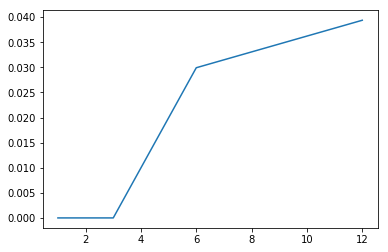

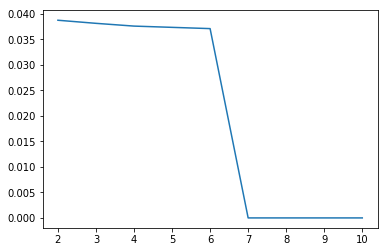

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

def interest_rate(coupon, face_value):
  return coupon/face_value

def gen_B(mat, prices):
  return {m:p for m,p in zip(mat, prices) }
 
B = gen_B(maturity_1, price_semi_anual_1)
  
def y(t):
  return -np.log(B(t))/t

maturity_1 = [1,2,3,6,12]
coupon_1 = [0,0,0,3,4]
price_semi_anual_1 = [99.8, 99.6, 99.4, 100.27, 101.57]
interest_rate_1 = [
    interest_rate(c, p) for p,c  in zip(price_semi_anual_1, coupon_1)
]


maturity_2 = [2,3,4,6,7,10]
coupon_2 = [4,4,4,4,0,0]
price_semi_anual_2 = [103.21, 104.85, 106.36, 107.77, 84.48, 77.72]
interest_rate_2 = [
    interest_rate(c, p) for p,c  in zip(price_semi_anual_2, coupon_2)
]

plt.plot(maturity_1, interest_rate_1); plt.show()
plt.plot(maturity_2, interest_rate_2)



In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

maturity_1 = [1,2,3,6,12]
coupon_1 = [0,0,0,3,4]
price_semi_anual_1 = [99.8, 99.6, 99.4, 100.27, 101.57]

maturity_2 = [2,3,4,6,7,10]
coupon_2 = [4,4,4,4,0,0]
price_semi_anual_2 = [103.21, 104.85, 106.36, 107.77, 84.48, 77.72]

interest_rate =lambda coupon, face_value: coupon/face_value
gen_B= lambda mat, prices:( {m:p for m,p in zip(mat, prices) })
B = gen_B(maturity_1, price_semi_anual_1)
B  
gen_y = lambda t, B: ({ -np.log(B[t])/t })

y_s= { t:gen_y(t,B) for t in maturity_1}
y_s

def interest(y, t):
  y[t]=w
# interest_rate_1 = [
#     interest_rate(c, p) for p,c  in zip(price_semi_anual_1, coupon_1)
# ]
# interest_rate_2 = [
#     interest_rate(c, p) for p,c  in zip(price_semi_anual_2, coupon_2)
# ]
# plt.plot(maturity_1, interest_rate_1); plt.show()
# plt.plot(maturity_2, interest_rate_2)



{1: {-4.603168183317418},
 2: {-2.300581082295276},
 3: {-1.5330507045541761},
 6: {-0.767977757922639},
 12: {-0.3850623513292841}}